# Principal Component Analysis
PCA is a very powerful tool that should be present in the arsenal of every serious Data Scientist. Sooner or later, you WILL run into a situation where PCA could make your life easier. It is one of those elegant ideas from Linear Algebra that have a host of applications in -

Dimensionality reduction/data compression
Data visualization and Exploratory Data Analysis
Create uncorrelated features/variables that can be an input to a prediction model
Uncovering latent variables/themes/concepts
Noise reduction in the dataset


In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
image = imread("C:\\Users\\This\\Desktop\\cat_16x9.jpg")

In [3]:
print(image.shape)

(393, 699, 3)


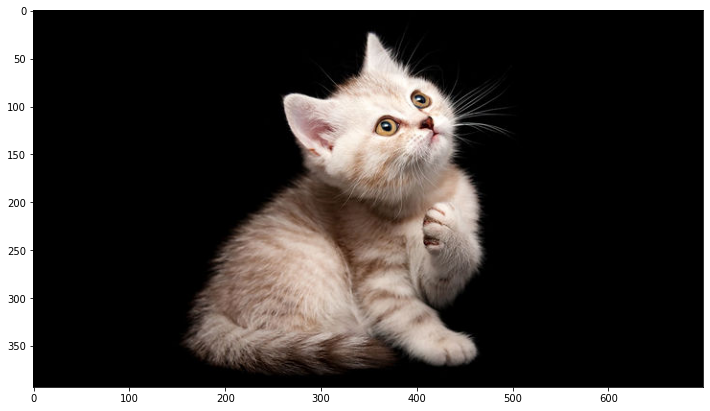

In [4]:
plt.figure(figsize=[12,8])
plt.imshow(image)

In [5]:
image_sum = image.sum(axis=2)
print(image_sum.shape)

(393, 699)


In [6]:
image_bw = image_sum/image_sum.max()
print(image_bw.max())


1.0


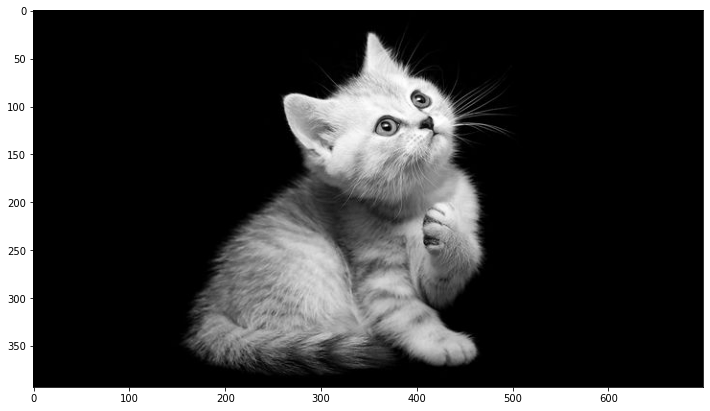

In [7]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [8]:
from sklearn.decomposition import PCA, IncrementalPCA

In [9]:
pca = PCA()
pca.fit(image_bw)

PCA()

In [10]:
#getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

In [11]:
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance   " +str(k))

Number of components explaining 95% variance   9


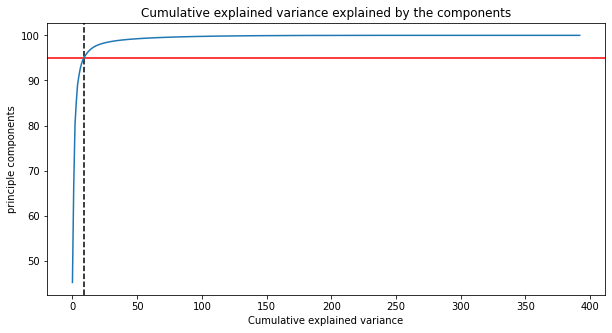

In [12]:
plt.figure(figsize=[10,5])
plt.title("Cumulative explained variance explained by the components")
plt.xlabel("Cumulative explained variance")
plt.ylabel("principle components")

plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=95, color="r")
ax = plt.plot(var_cumu)

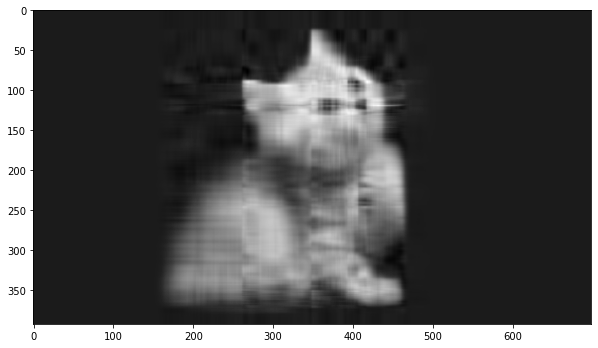

In [13]:
ipca = IncrementalPCA(n_components = k)
image_rec = ipca.inverse_transform(ipca.fit_transform(image_bw))

plt.figure(figsize=[10,10])
plt.imshow(image_rec, cmap=plt.cm.gray)

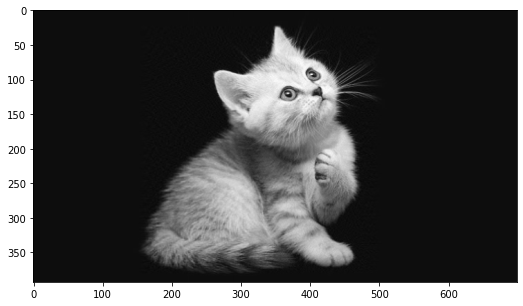

In [14]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon, cmap=plt.cm.gray)

k = 150
plt.figure(figsize=[10,5])
plot_at_k(100)

C:\Users\This\anaconda3\lib\site-packages\sklearn\decomposition\_incremental_pca.py:313: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\This\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


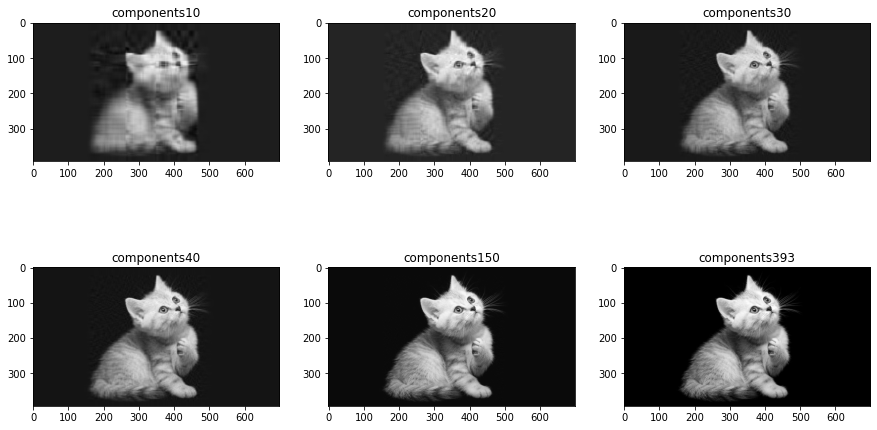

In [15]:
ks =ks = [10,20,30,40,150,393]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("components"+str(ks[i]))
    
plt.subplots_adjust(wspace=0.2,hspace=0.0)
plt.show()

# Happy Learning